In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import os
import pickle
import time
from torch.optim.lr_scheduler import StepLR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

Problem 1

In [12]:
file_path = r'C:\Users\SirM\Downloads\Housing - Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
yes_no_mapping = {'yes': 1, 'no': 0}
furnishing_mapping = {'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0}
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing_columns = ['furnishingstatus']
housing[yes_no_columns] = housing[yes_no_columns].applymap(yes_no_mapping.get)
housing[furnishing_columns] = housing[furnishing_columns].applymap(furnishing_mapping.get)

X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
#X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y1 = housing['price'].values.reshape(-1,1)
#y1 = housing['price']

C:\Users\SirM\AppData\Local\Temp\ipykernel_10228\2974789378.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  housing[yes_no_columns] = housing[yes_no_columns].applymap(yes_no_mapping.get)
C:\Users\SirM\AppData\Local\Temp\ipykernel_10228\2974789378.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  housing[furnishing_columns] = housing[furnishing_columns].applymap(furnishing_mapping.get)


In [13]:
from sklearn.model_selection import train_test_split
seed = 0
torch.manual_seed = seed
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_val_scaled = scaler.transform(X1_val)

X_train_tensor = torch.tensor(X1_train_scaled, dtype = torch.float32)
X_val_tensor = torch.tensor(X1_val_scaled, dtype = torch.float32)
y_train_tensor = torch.tensor(y1_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y1_val, dtype=torch.float32)

Problem 1A

In [15]:
model = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.detach().item())
        val_losses.append(val_loss.detach().item())


        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss.item():.4f}, Validation loss {val_loss.item():.4f}")

    return train_losses, val_losses

In [16]:
# Model
train_losses1, val_losses1 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469982011392.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 20980980252672.0000, Validation loss 19934266523648.0000
Epoch 200, Training loss 16768055640064.0000, Validation loss 15907842686976.0000
Epoch 300, Training loss 13560692342784.0000, Validation loss 12834763177984.0000
Epoch 400, Training loss 11097044156416.0000, Validation loss 10468157554688.0000
Epoch 500, Training loss 9191489011712.0000, Validation loss 8632778358784.0000
Epoch 600, Training loss 7709441130496.0000, Validation loss 7201382989824.0000
Epoch 700, Training loss 6551530110976.0000, Validation loss 6079880626176.0000
Epoch 800, Training loss 5643287658496.0000, Validation loss 5197655441408.0000
Epoch 900, Training loss 4928288849920.0000, Validation loss 4501112094720.0000
Epoch 1000, Training loss 4363418337280.0000, Validation loss 3949235011584.0000
Epoch 1100, Training loss 3915516739584.0000, Validation loss 3510419062784.0000
Epoch 1200, Training loss 3558

Problem 1B

In [17]:
# Model
model1 = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 1)
)
optimizer1 = optim.SGD(model1.parameters(), lr=0.0001)


train_losses2, val_losses2 = training_loop(
    n_epochs = 10000,
    optimizer = optimizer1,  # Use the new optimizer
    model = model1,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)
epochs = range(1, len(train_losses1) + 1)

Epoch 1, Training loss 26469977817088.0000, Validation loss 25189242896384.0000
Epoch 100, Training loss 15346760155136.0000, Validation loss 14213989793792.0000
Epoch 200, Training loss 9566037213184.0000, Validation loss 8540952461312.0000
Epoch 300, Training loss 6640824221696.0000, Validation loss 5692343189504.0000
Epoch 400, Training loss 5160574124032.0000, Validation loss 4266586013696.0000
Epoch 500, Training loss 4411523334144.0000, Validation loss 3556298719232.0000
Epoch 600, Training loss 4032479625216.0000, Validation loss 3204830199808.0000
Epoch 700, Training loss 3840672792576.0000, Validation loss 3032639078400.0000
Epoch 800, Training loss 3743612141568.0000, Validation loss 2949532876800.0000
Epoch 900, Training loss 3694497103872.0000, Validation loss 2910343921664.0000
Epoch 1000, Training loss 3669643493376.0000, Validation loss 2892551159808.0000
Epoch 1100, Training loss 3657066872832.0000, Validation loss 2884997218304.0000
Epoch 1200, Training loss 3650702278

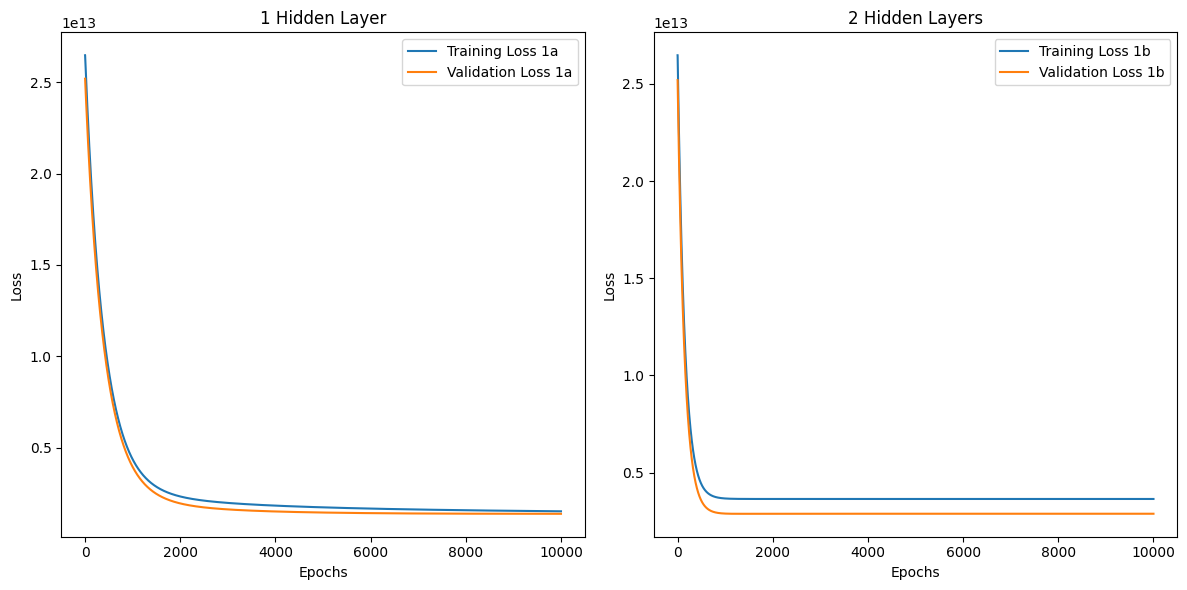

In [18]:
plt.figure(figsize=(12, 6))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses1, label='Training Loss 1a')
plt.plot(epochs, val_losses1, label='Validation Loss 1a')
plt.title('1 Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation losses
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses2, label='Training Loss 1b')
plt.plot(epochs, val_losses2, label='Validation Loss 1b')
plt.title('2 Hidden Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Problem 2A

In [19]:
# Neural Network Class
class ExtendedNet(nn.Module):
    def __init__(self):
        super(ExtendedNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

In [20]:
def load_cifar10_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], dict[b'labels']

def load_cifar10_data(data_dir):
    train_data = []
    train_labels = []

    for i in range(1, 6):
        data_batch, label_batch = load_cifar10_batch(os.path.join(data_dir, f'data_batch_{i}'))
        train_data.append(data_batch)
        train_labels.append(label_batch)

    train_data = np.concatenate(train_data)
    train_labels = np.concatenate(train_labels)

    test_data, test_labels = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))

    return train_data, train_labels, test_data, test_labels

In [22]:
if __name__ == "__main__":
    cifar10_dir = r'C:\Users\SirM\Downloads\cifar-10-batches-py'

    train_data, train_labels, test_data, test_labels = load_cifar10_data(cifar10_dir)
    train_data = torch.tensor(train_data, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    test_data = torch.tensor(test_data, dtype=torch.float32)
    test_labels = torch.tensor(test_labels, dtype=torch.long)

    train_data /= 255.0
    test_data /= 255.0


    trainloader = torch.utils.data.DataLoader(list(zip(train_data, train_labels)), batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(list(zip(test_data, test_labels)), batch_size=64, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    extended_net = ExtendedNet().to(device)
    optimizer = optim.SGD(extended_net.parameters(), lr=0.001, momentum=0.9)
    criterion = nn.CrossEntropyLoss()

In [23]:
    start_time = time.time()
    for epoch in range(100):  
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = extended_net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

    end_time = time.time()
    training_time = end_time - start_time
    print('Training time: ', training_time)


Epoch 1, loss: 2.131750025255296
Epoch 2, loss: 1.9108330878760198
Epoch 3, loss: 1.8410884116006934
Epoch 4, loss: 1.7946224599848013
Epoch 5, loss: 1.7586854191692285
Epoch 6, loss: 1.7288304399651335
Epoch 7, loss: 1.6990656814611782
Epoch 8, loss: 1.6702810431380406
Epoch 9, loss: 1.6447941807224928
Epoch 10, loss: 1.621143117127821
Epoch 11, loss: 1.5991850454179222
Epoch 12, loss: 1.5758074145487813
Epoch 13, loss: 1.5541507034655422
Epoch 14, loss: 1.5371515130447915
Epoch 15, loss: 1.515831752658805
Epoch 16, loss: 1.5023890909026651
Epoch 17, loss: 1.4807795444717797
Epoch 18, loss: 1.467477783979967
Epoch 19, loss: 1.4480297545642804
Epoch 20, loss: 1.4366596546929207
Epoch 21, loss: 1.4241511696744757
Epoch 22, loss: 1.4119087200030647
Epoch 23, loss: 1.396800042723146
Epoch 24, loss: 1.3882159391022704
Epoch 25, loss: 1.375370424726735
Epoch 26, loss: 1.358620690262836
Epoch 27, loss: 1.3500941792107604
Epoch 28, loss: 1.3426745945535352
Epoch 29, loss: 1.325751919728106
Ep

In [25]:
    correct = 0
    total = 0
    with torch.no_grad():
         for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = extended_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
all_predictions = []
all_labels = []

with torch.no_grad():
     for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = extended_net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    print(f'Accuracy 2A: {accuracy} %')

# Calculate F1 Score
f1 = f1_score(all_labels, all_predictions, average='weighted')
print(f'F1 Score for Problem 2A: {f1}')

Accuracy 2A: 53.83 %
F1 Score for Problem 2A: 0.536190819844518


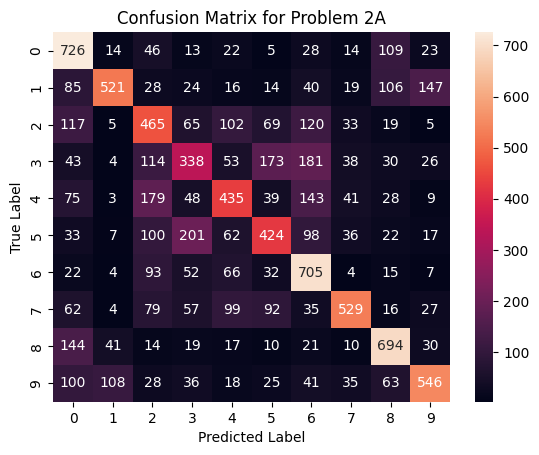

In [26]:
# Generate Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Problem 2A')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Problem 2B

In [27]:
class ExtendedNet(nn.Module):
    def __init__(self):
        super(ExtendedNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)  # First additional hidden layer
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)  # Second additional hidden layer
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x
    
extended_net = ExtendedNet().to(device)
optimizer = optim.SGD(extended_net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

In [28]:
start_time = time.time()
for epoch in range(300):  # Train for 300 epochs
    scheduler.step()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = extended_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(trainloader)}')

end_time = time.time()
training_time = end_time - start_time
print('Training time: ', training_time)

c:\Users\SirM\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1, loss: 2.034341328131878
Epoch 2, loss: 1.820677678450904
Epoch 3, loss: 1.750015671600771
Epoch 4, loss: 1.6995828708114527
Epoch 5, loss: 1.6670907780032633
Epoch 6, loss: 1.6394075771122028
Epoch 7, loss: 1.6159762377324312
Epoch 8, loss: 1.5943758961794627
Epoch 9, loss: 1.575002871358486
Epoch 10, loss: 1.5580350654509367
Epoch 11, loss: 1.5451963963106161
Epoch 12, loss: 1.5276472605097935
Epoch 13, loss: 1.5104920338181889
Epoch 14, loss: 1.496347929510619
Epoch 15, loss: 1.4901133736076257
Epoch 16, loss: 1.4792946625853438
Epoch 17, loss: 1.4636051563350745
Epoch 18, loss: 1.4570455162421516
Epoch 19, loss: 1.4469964423447923
Epoch 20, loss: 1.4350115329103397
Epoch 21, loss: 1.4338401583454492
Epoch 22, loss: 1.4254686253150102
Epoch 23, loss: 1.4079429569756587
Epoch 24, loss: 1.4057366087308625
Epoch 25, loss: 1.400463160651419
Epoch 26, loss: 1.391613990297098
Epoch 27, loss: 1.3854951451501578
Epoch 28, loss: 1.3739734847679772
Epoch 29, loss: 1.367997920421688
Ep

In [29]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = extended_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy} %')

all_predictions = []
all_labels = []

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = extended_net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate F1 Score
f1 = f1_score(all_labels, all_predictions, average='weighted')
print(f'F1 Score for Problem 2B: {f1}')

Accuracy of the network on the 10000 test images: 49.0 %
F1 Score for Problem 2B: 0.48792058156608326


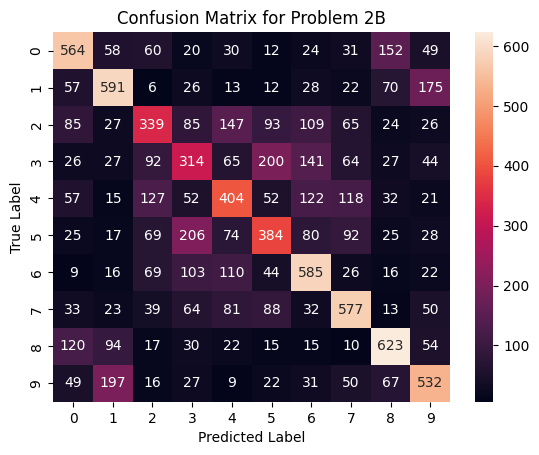

In [30]:
# Generate Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Problem 2B')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()